In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\employee_attrition_dataset_10000.csv')
df = data.copy()
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [3]:
colors = ["#2c3e50", "#34495e", "#7f8c8d", "#e74c3c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]
sns.set_palette(colors)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [5]:
df.shape

(10000, 26)

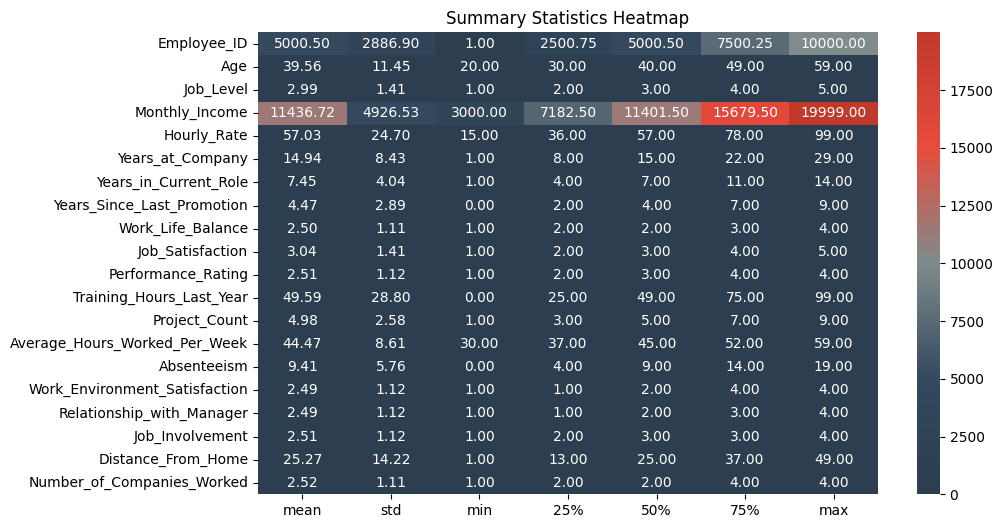

In [6]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
desc = df.describe().T

plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap=custom_cmap, fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

In [7]:
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [8]:
missing_percentage = df.isnull().mean() * 100

missing_table = pd.DataFrame({
    'Missing Data Percentage (%)': missing_percentage
}).reset_index().rename(columns={'index': 'Column'})

print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------+-------------------------------+
| Column                        |   Missing Data Percentage (%) |
+===============================+===============================+
| Employee_ID                   |                             0 |
+-------------------------------+-------------------------------+
| Age                           |                             0 |
+-------------------------------+-------------------------------+
| Gender                        |                             0 |
+-------------------------------+-------------------------------+
| Marital_Status                |                             0 |
+-------------------------------+-------------------------------+
| Department                    |                             0 |
+-------------------------------+-------------------------------+
| Job_Role                      |                             0 |
+-------------------------------+-------------------------------+
| Job_Leve

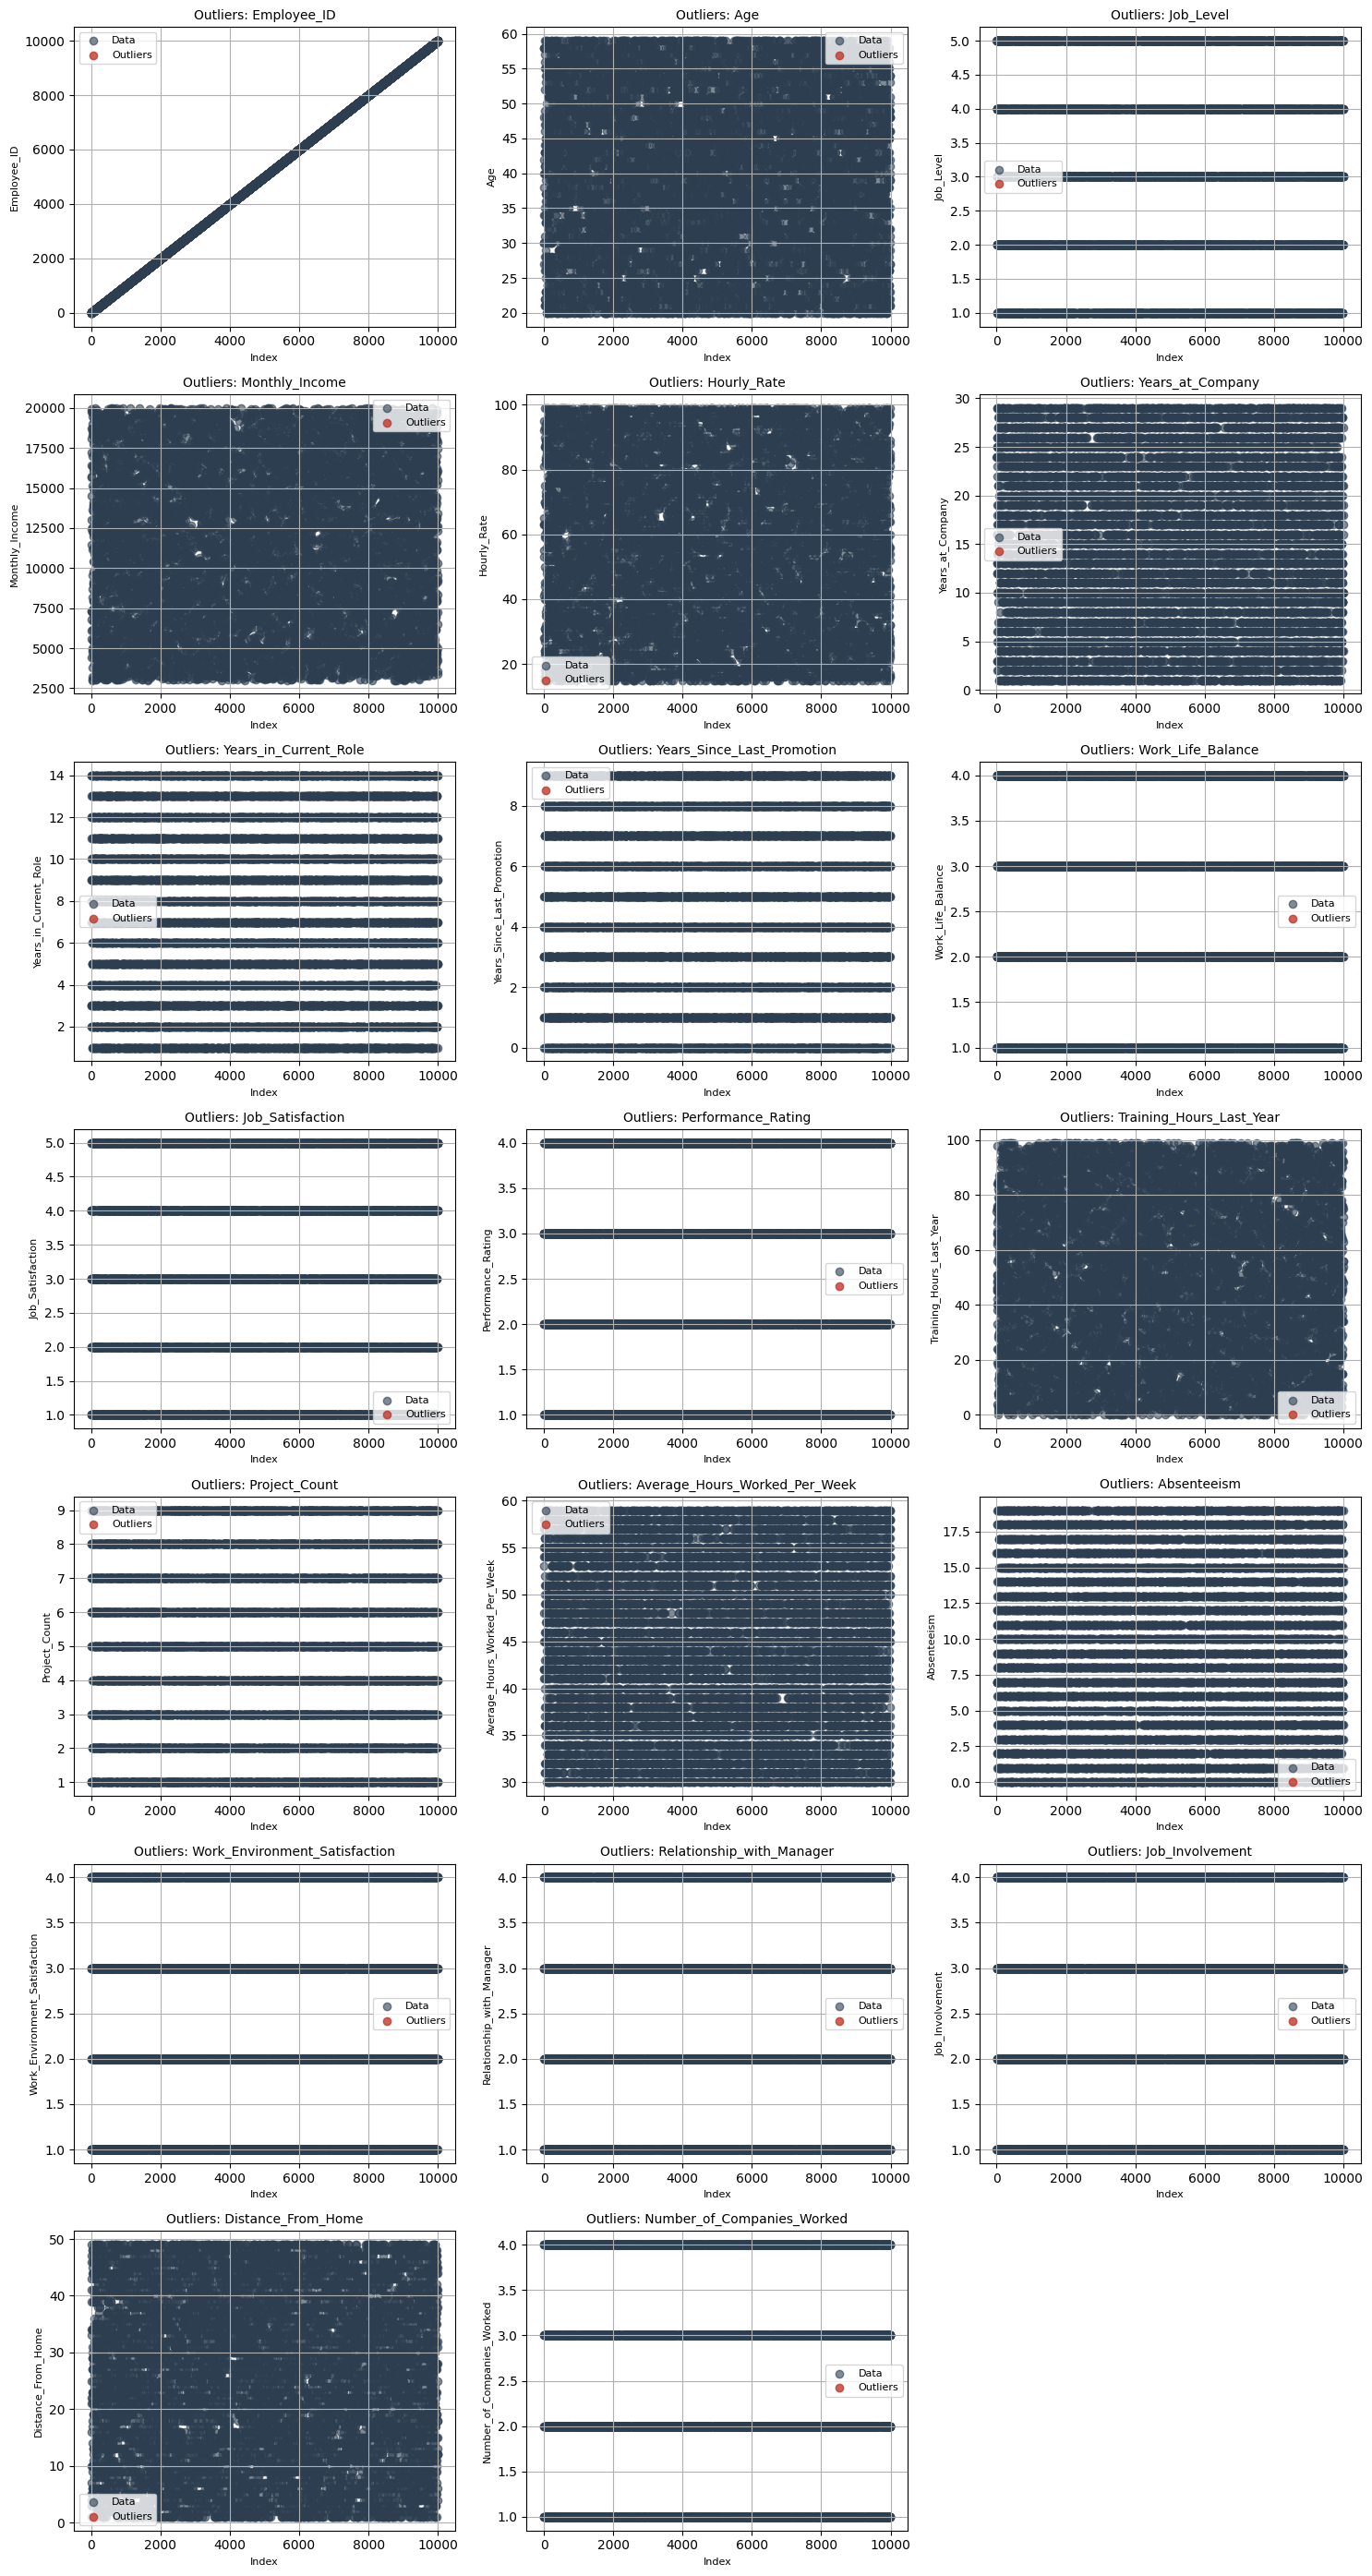

In [9]:
def plot_outliers_iqr(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    threshold = 1.5
    n_cols = 3 
    n_rows = -(-len(numeric_columns) // n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
    axes = axes.flatten() 
    
    color_data = colors[0]
    color_outliers = colors[-1]
    
    for idx, column in enumerate(numeric_columns):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

        axes[idx].scatter(data.index, data[column], label='Data', alpha=0.6, color=color_data)
        axes[idx].scatter(data.index[outliers], data[column][outliers], label='Outliers', color=color_outliers, alpha=0.8)
        axes[idx].set_title(f"Outliers: {column}", fontsize=10)
        axes[idx].set_xlabel("Index", fontsize=8)
        axes[idx].set_ylabel(column, fontsize=8)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True)
        
    for ax in axes[len(numeric_columns):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
plot_outliers_iqr(df)

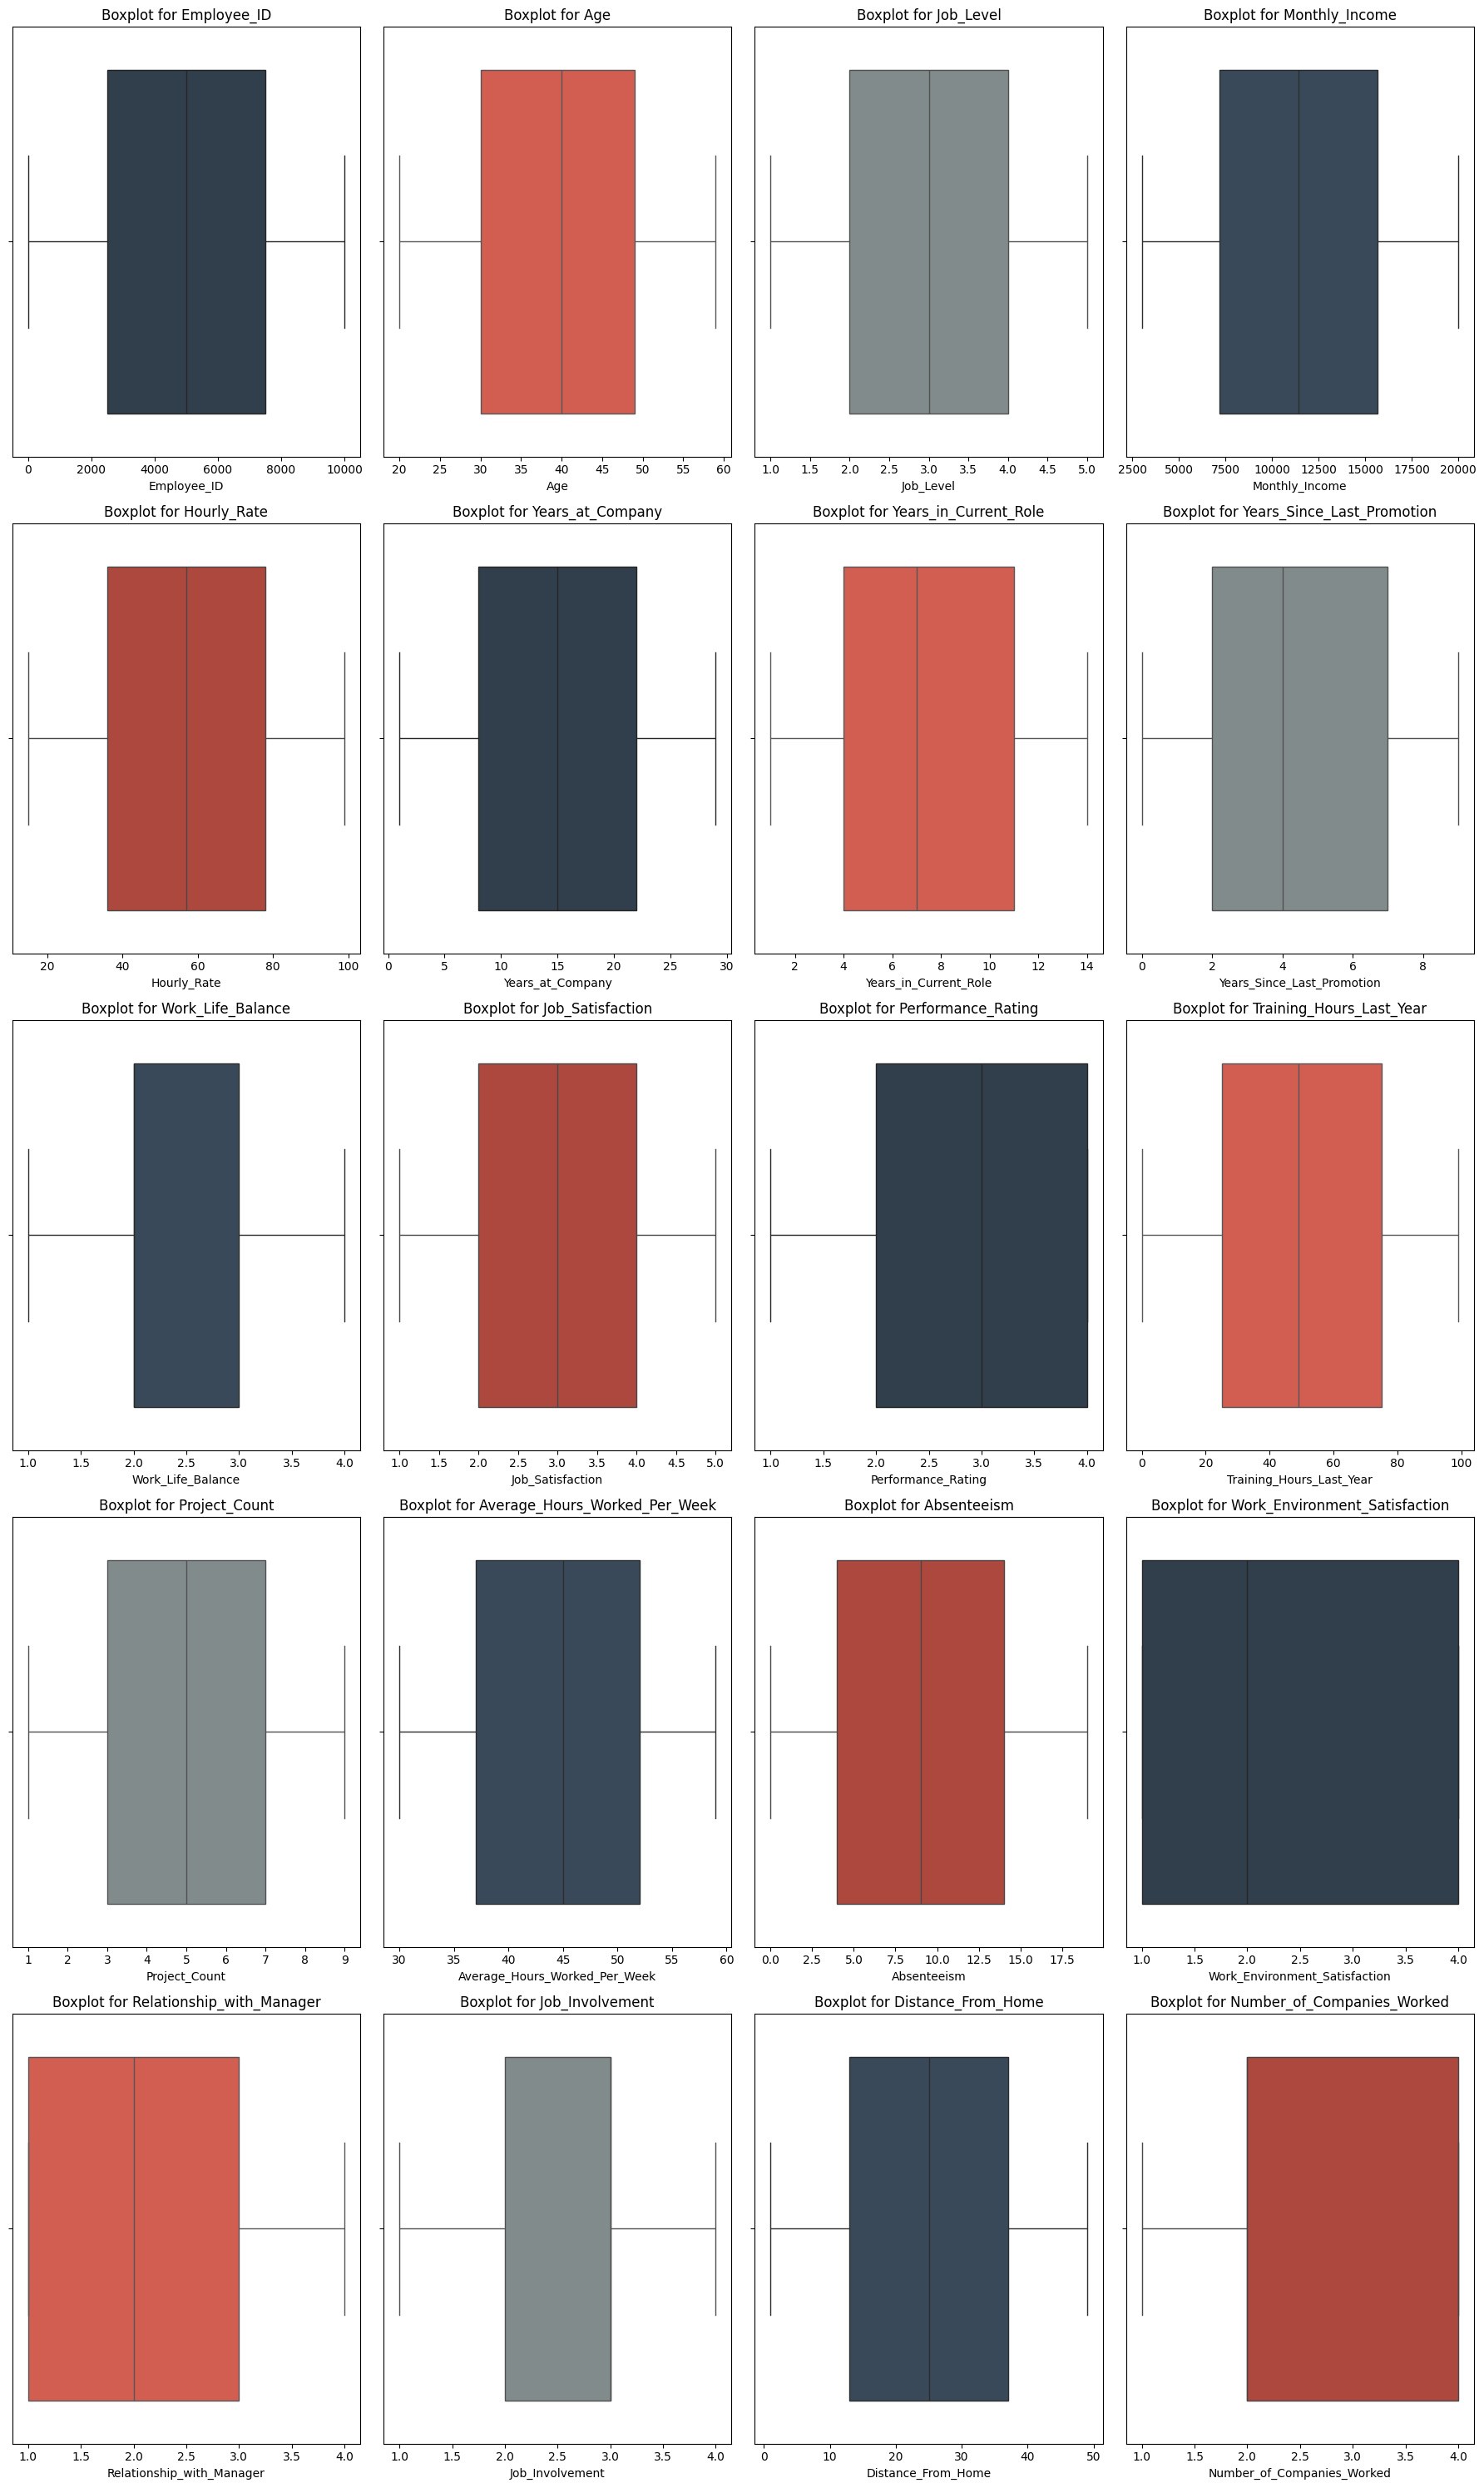

In [10]:
def plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row) 

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        sns.boxplot(x=df[column], ax=axes[i], color=ordered_colors[i % len(ordered_colors)])
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_outliers(df)

In [11]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df = remove_outliers(df)

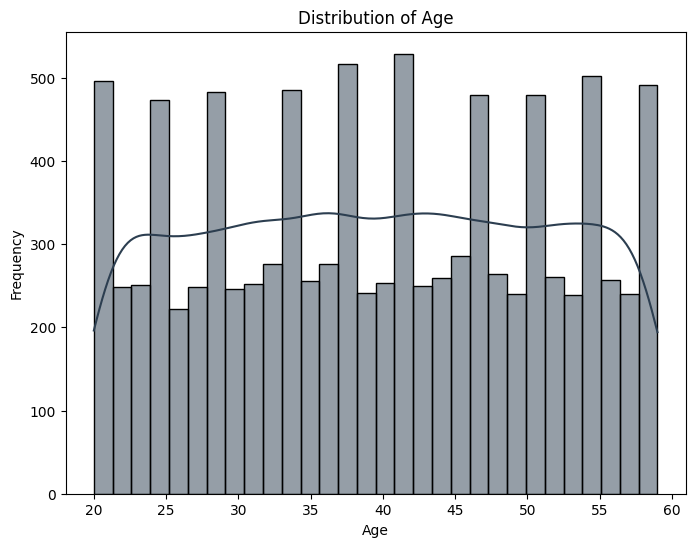

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, palette=ordered_colors)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

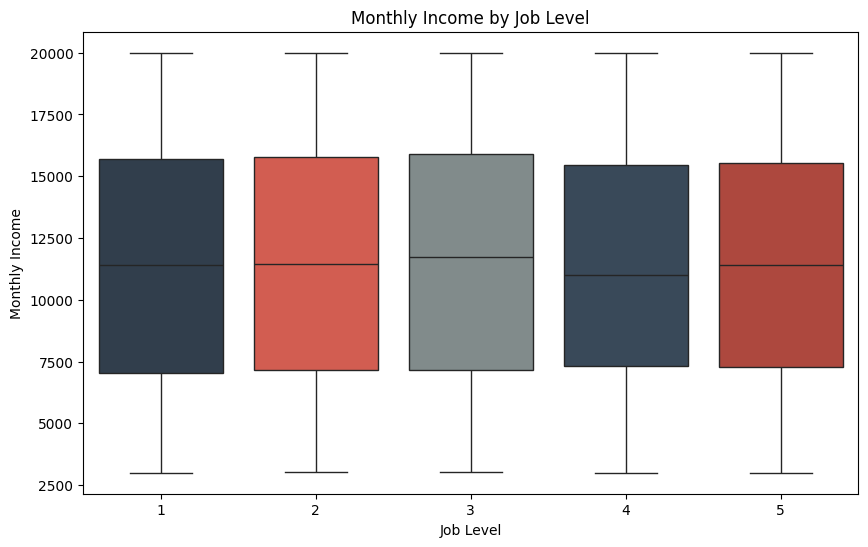

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Level', y='Monthly_Income', data=df, palette=ordered_colors)
plt.title('Monthly Income by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

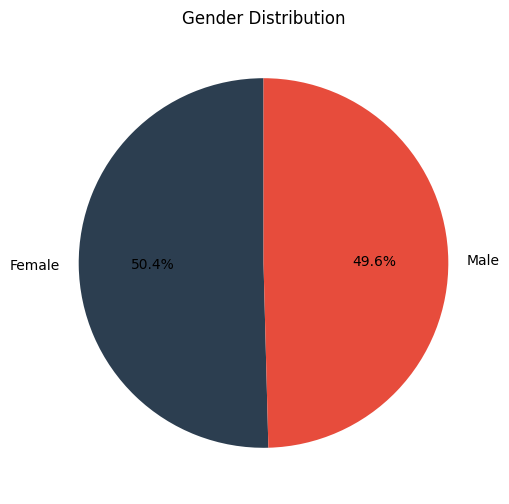

In [14]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=ordered_colors)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

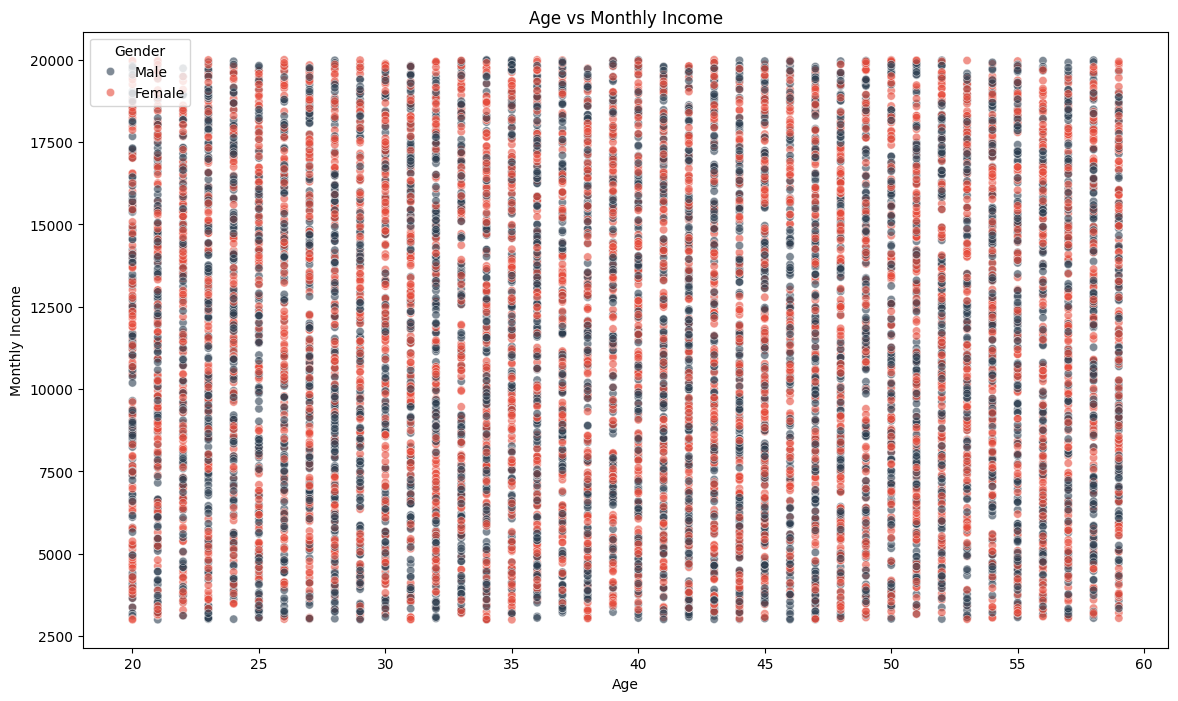

In [15]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age', y='Monthly_Income', hue='Gender', data=df, alpha=0.6, palette=ordered_colors)
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Gender')
plt.show()

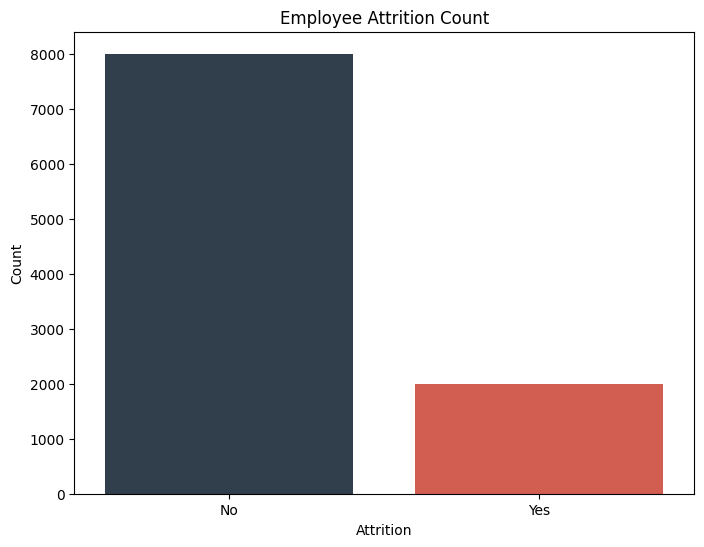

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette=ordered_colors)
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

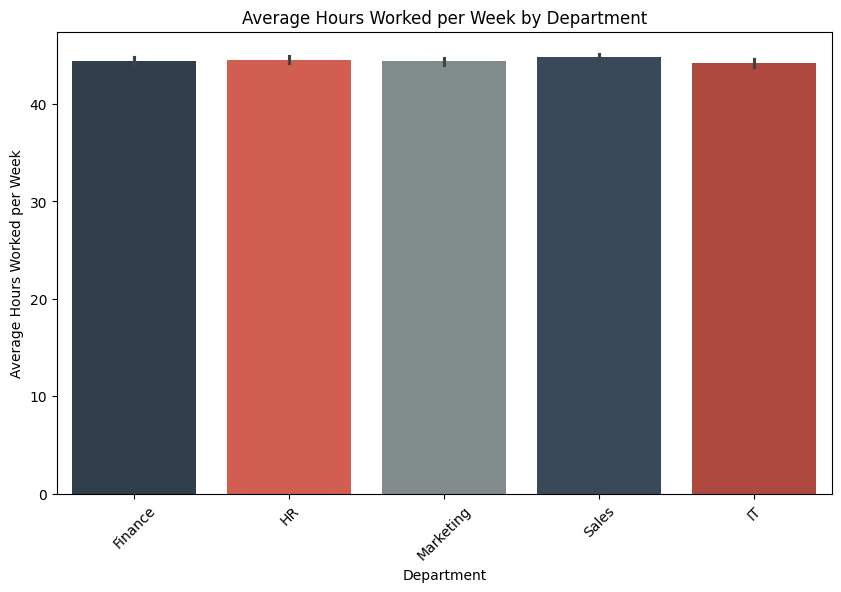

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Average_Hours_Worked_Per_Week', data=df, palette= ordered_colors)
plt.title('Average Hours Worked per Week by Department')
plt.xlabel('Department')
plt.ylabel('Average Hours Worked per Week')
plt.xticks(rotation=45)
plt.show()

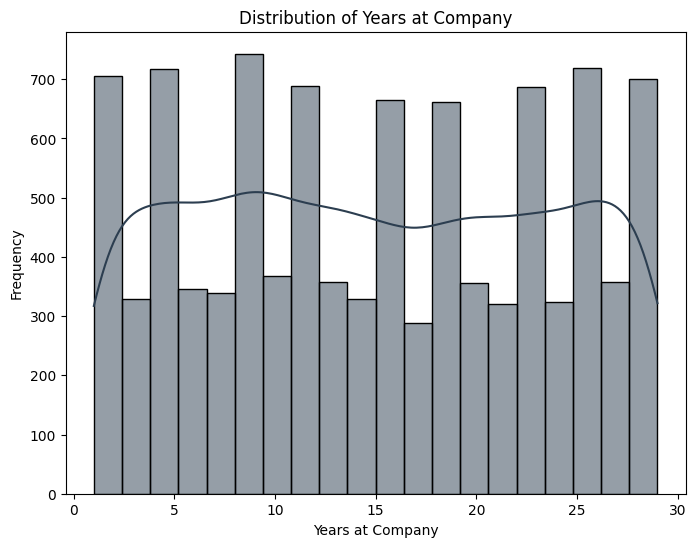

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Years_at_Company'], bins=20, kde=True, palette=ordered_colors[-1])
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

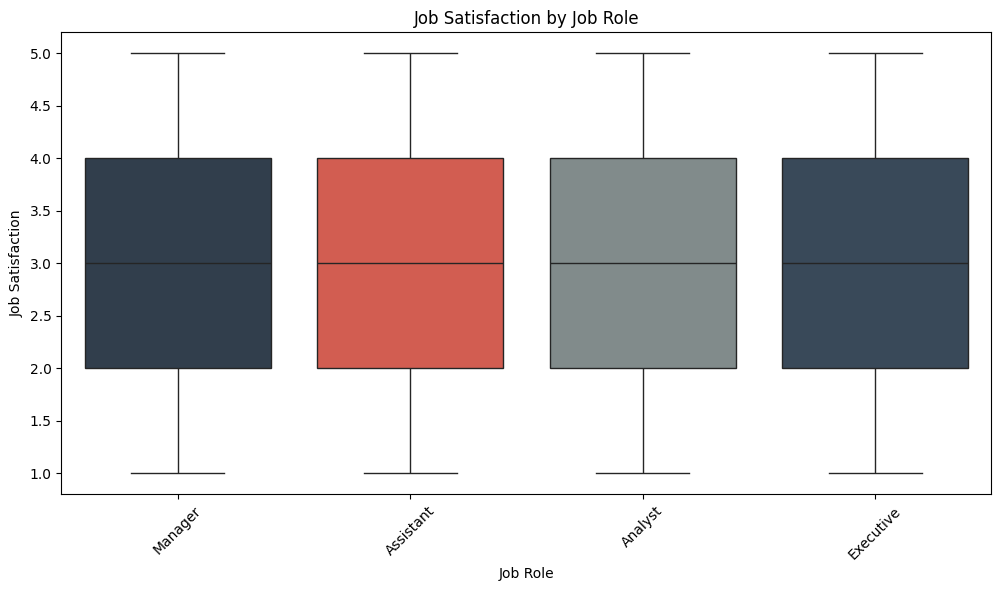

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job_Role', y='Job_Satisfaction', data=df, palette=ordered_colors)
plt.title('Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

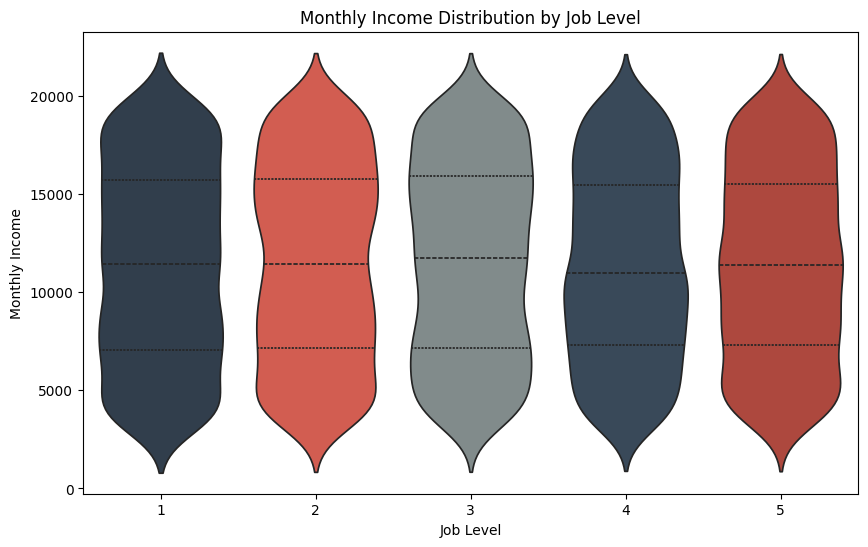

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Job_Level', y='Monthly_Income', data=df, palette=ordered_colors, inner='quartile')
plt.title('Monthly Income Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

In [21]:
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [22]:
df = df.drop(columns=['Employee_ID'])

In [23]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male

Column: Marital_Status
0 -> Divorced
1 -> Married
2 -> Single

Column: Department
0 -> Finance
1 -> HR
2 -> IT
3 -> Marketing
4 -> Sales

Column: Job_Role
0 -> Analyst
1 -> Assistant
2 -> Executive
3 -> Manager

Column: Overtime
0 -> No
1 -> Yes

Column: Attrition
0 -> No
1 -> Yes



In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition',axis = 1)
y = df['Attrition']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(8000, 24) (2000, 24)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [28]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.771

In [29]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_cv_model = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_cv_model.fit(X_train, y_train)
print("Best parameters:", knn_cv_model.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [30]:
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', metric = 'manhattan')
knn_tuned = knn.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

knn_tuned_accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", knn_tuned_accuracy)

Model accuracy: 0.7915


In [31]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

In [32]:
log_accuracy = accuracy_score(y_test, y_pred)
log_accuracy

0.796

In [33]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'solver': ['liblinear', 'lbfgs', 'saga'],
}

log_reg_cv_model = GridSearchCV(estimator=log_reg, param_grid=log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_cv_model.fit(X_train, y_train)

print("Best parameters:", log_reg_cv_model.best_params_)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [34]:
log_reg = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
log_reg_tuned = log_reg.fit(X_train, y_train)
y_pred = log_reg_tuned.predict(X_test)

log_reg_tuned_accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", log_reg_tuned_accuracy)

Model accuracy: 0.796


In [35]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [36]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.796

In [37]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [38]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.6685

In [39]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'criterion': ['gini', 'entropy']}

dt_cv_model = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

print("Best parameters:", dt_cv_model.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [40]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='entropy', random_state=42)
dt_tuned = dt.fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)

dt_tuned_accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", dt_tuned_accuracy)

Model accuracy: 0.7725


In [41]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [42]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.7705

In [48]:
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42)
xgb_tuned = xgb.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)

xgb_tuned_accuracy = accuracy_score(y_test, y_pred)
print("Tuned Model Accuracy:", xgb_tuned_accuracy)

Tuned Model Accuracy: 0.79


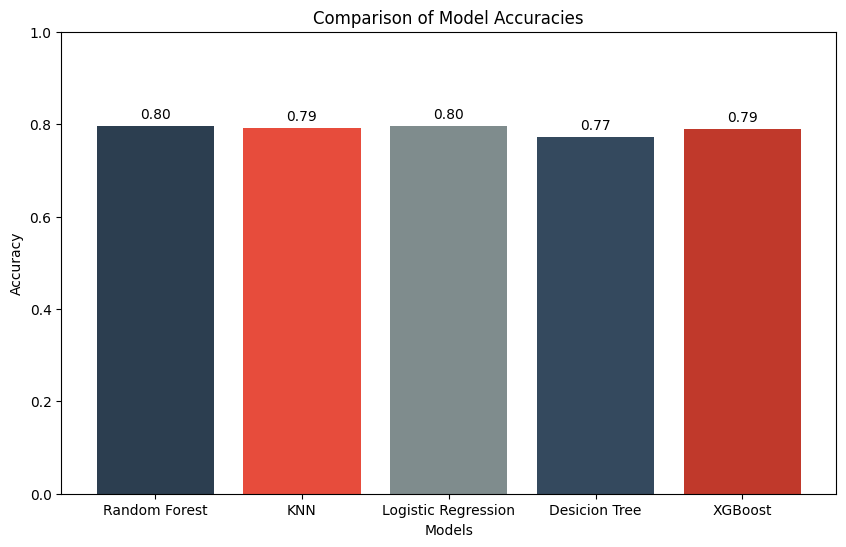

In [51]:
models = ['Random Forest', 'KNN', 'Logistic Regression', 'Desicion Tree', 'XGBoost']
accuracies = [rf_accuracy, knn_tuned_accuracy, log_reg_tuned_accuracy, dt_tuned_accuracy, xgb_tuned_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=ordered_colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()